In [1]:
import torch
import dhg
import matplotlib.pyplot as plt

dhg.random.set_seed(7)

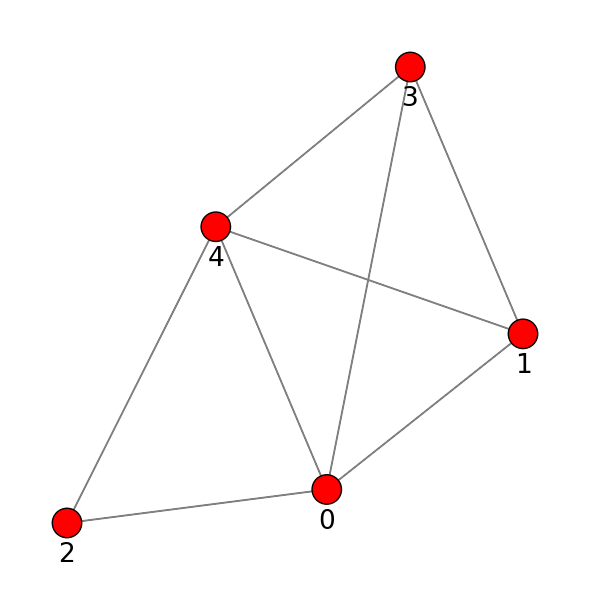

([(0, 1), (2, 4), (0, 4), (3, 4), (0, 3), (1, 4), (0, 2), (1, 3)],
 tensor([[0.7405, 0.2529],
         [0.2332, 0.9314],
         [0.9575, 0.5575],
         [0.4134, 0.4355],
         [0.7369, 0.0331]]),
 tensor([[0.5852, 0.4894],
         [0.6303, 0.2405],
         [0.7387, 0.1430],
         [0.5702, 0.4058],
         [0.5862, 0.5443]]))

In [6]:
g = dhg.random.graph_Gnm(5, 8)
X = torch.rand(5, 2)
g.draw(v_label=[0, 1, 2, 3, 4])
plt.show()


In [28]:
g = dhg.random.graph_Gnm(5, 8)
print(g)
hg = dhg.Hypergraph.from_graph_kHop(g, k=1)
g.e[0], hg.e

Graph(num_v=5, num_e=8)


([(0, 1), (2, 4), (1, 2), (0, 4), (3, 4), (1, 4), (2, 3), (1, 3)],
 ([(0, 1, 4), (0, 1, 2, 3, 4), (1, 2, 3, 4)], [1.0, 1.0, 1.0]))

In [22]:
# 5个节点 8条边的图结构
g = dhg.random.graph_Gnm(5, 8)
# 节点特征
X = torch.rand([5, 2]) 


X_ = g.smoothing_with_GCN(X)
g.L_GCN.to_dense(), X, X_

(tensor([[0.2000, 0.2236, 0.2582, 0.2000, 0.2236],
         [0.2236, 0.2500, 0.0000, 0.2236, 0.2500],
         [0.2582, 0.0000, 0.3333, 0.2582, 0.0000],
         [0.2000, 0.2236, 0.2582, 0.2000, 0.2236],
         [0.2236, 0.2500, 0.0000, 0.2236, 0.2500]]),
 tensor([[0.7793, 0.9795],
         [0.7359, 0.1731],
         [0.1847, 0.0966],
         [0.1300, 0.7488],
         [0.8687, 0.1866]]),
 tensor([[0.5884, 0.4510],
         [0.6045, 0.4764],
         [0.2964, 0.4784],
         [0.5884, 0.4510],
         [0.6045, 0.4764]]))

In [25]:
hg = dhg.random.hypergraph_Gnm(5, 4)

hg.L_HGNN.to_dense()

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.5000, 0.0000, 0.0000, 0.2887],
        [0.0000, 0.0000, 0.5000, 0.2500, 0.2041],
        [0.0000, 0.0000, 0.2500, 0.5000, 0.2041],
        [0.0000, 0.2887, 0.2041, 0.2041, 0.5000]])

In [38]:
g = dhg.random.graph_Gnm(5, 8)

X = torch.rand(5, 2)

# 对每个节点的相邻节点做平均得到X_
X_ = g.v2v(X, aggr="mean")
print(X_)
e_weight = g.e_weight
X_ = g.v2v(X, aggr="softmax_then_sum", e_weight=e_weight)
print(X_)


tensor([[0.5530, 0.4537],
        [0.5254, 0.3056],
        [0.5754, 0.3941],
        [0.7186, 0.4283],
        [0.6230, 0.3607]])
tensor([[0.5530, 0.4537],
        [0.5254, 0.3056],
        [0.5754, 0.3941],
        [0.7186, 0.4283],
        [0.6230, 0.3607]])


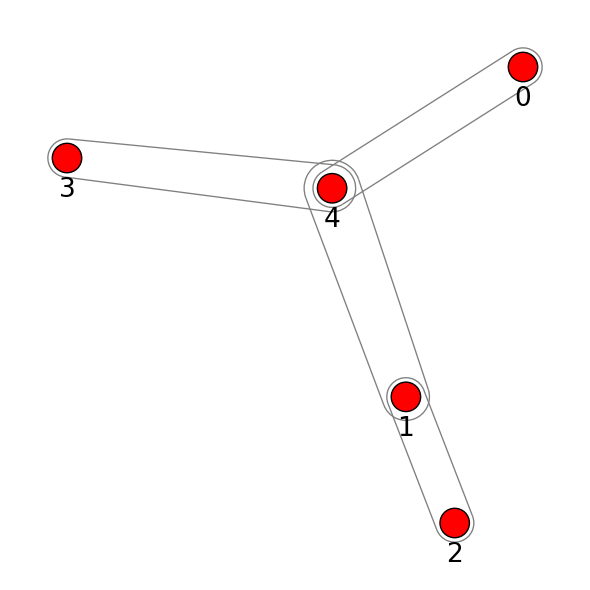

([(1, 2), (0, 4), (3, 4), (1, 4)], [1.0, 1.0, 1.0, 1.0]) tensor([[0.8829, 0.4132],
        [0.7572, 0.6948],
        [0.5209, 0.5932],
        [0.8797, 0.6286],
        [0.7653, 0.1132]]) tensor([[0.6391, 0.6440],
        [0.8241, 0.2632],
        [0.8225, 0.3709],
        [0.7612, 0.4040]])
tensor([[0.8241, 0.2632],
        [0.7001, 0.5240],
        [0.6391, 0.6440],
        [0.8225, 0.3709],
        [0.8026, 0.3460]])


In [56]:
g = dhg.random.hypergraph_Gnm(5, 4)
X = torch.rand(5, 2)
g.draw(v_label=[0, 1, 2, 3, 4])
plt.show()
# 对每条的超边上的图节点进行节点特征相加并作平均
Y_ = g.v2e(X, aggr="mean")
print(g.e, X, Y_)

X_ = g.e2v(Y_, aggr="mean")
print(X_)

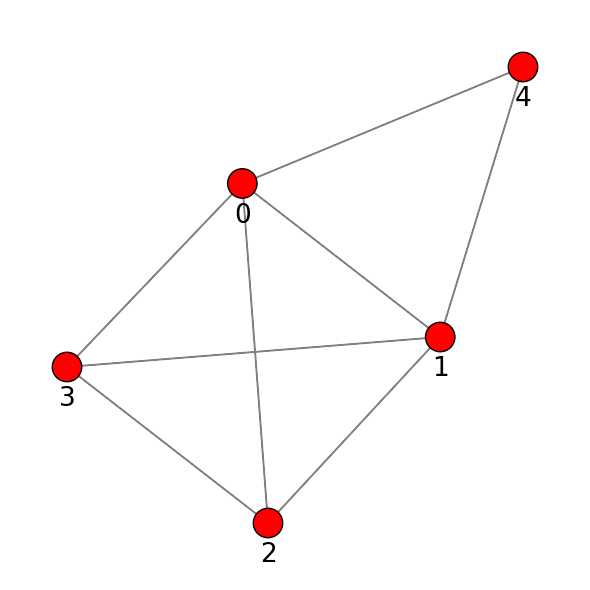

[(0, 1), (1, 2), (0, 4), (0, 3), (1, 4), (2, 3), (0, 2), (1, 3)] tensor([[0.1470, 0.2019],
        [0.7259, 0.4731],
        [0.0444, 0.1539],
        [0.1956, 0.8861],
        [0.7264, 0.8868]])
[(0, 1), (1, 2), (0, 4), (0, 3), (1, 4), (2, 3), (0, 2), (1, 3), (0, 0), (1, 1), (2, 2), (3, 3), (4, 4)]


tensor([[0.3679, 0.5204],
        [0.3679, 0.5204],
        [0.2782, 0.4288],
        [0.2782, 0.4288],
        [0.5331, 0.5206]])

In [63]:
g = dhg.random.graph_Gnm(5, 8)
X = torch.rand(5, 2)
g.draw(v_label=[0, 1, 2, 3, 4])
plt.show()
print(g.e[0], X)

g.add_extra_selfloop()
print(g.e[0])
X_ = g.v2v(X, aggr="mean")
X_

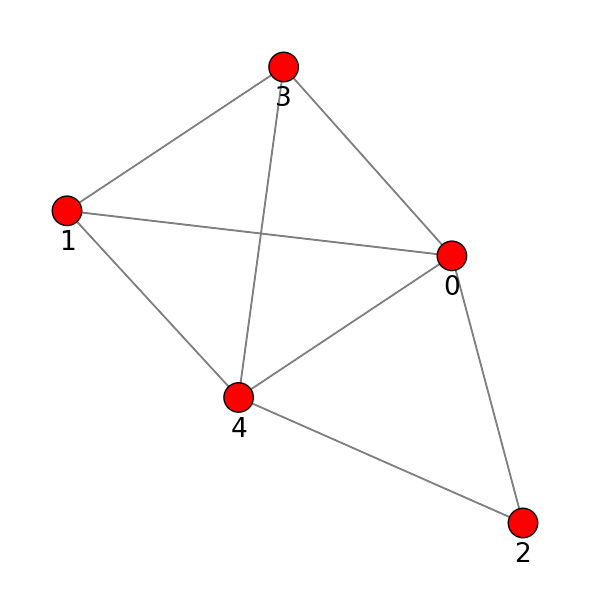

[(0, 1), (2, 4), (0, 4), (3, 4), (0, 3), (1, 4), (0, 2), (1, 3)] tensor([[0.1278, 0.0125],
        [0.1721, 0.5535],
        [0.4012, 0.1849],
        [0.8640, 0.3388],
        [0.2108, 0.7310]])


tensor([[0.5398, 0.4645],
        [0.5730, 0.9142],
        [0.5705, 0.5567],
        [1.0342, 0.7711],
        [0.6021, 1.0034]])

In [64]:
g = dhg.random.graph_Gnm(5, 8)
X = torch.rand(5, 2)
g.draw(v_label=[0, 1, 2, 3, 4])
plt.show()
print(g.e[0], X)

X_ = X + g.v2v(X, aggr="mean")
X_

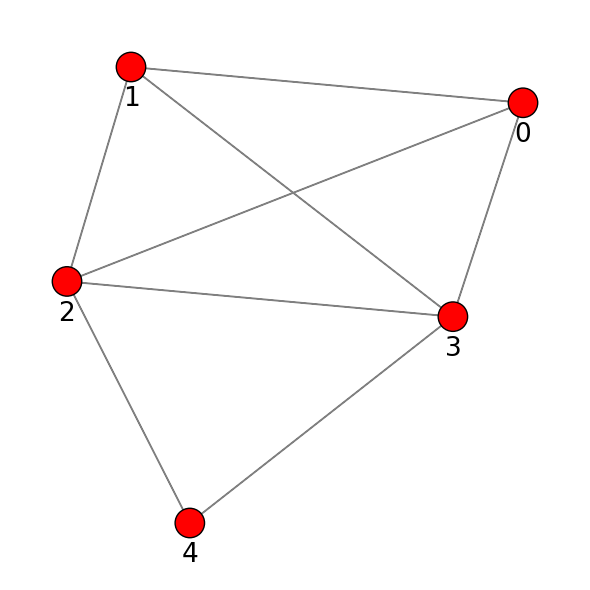

tensor([[0.1908, 0.3441],
        [0.0326, 0.7688],
        [0.9323, 0.6635],
        [0.1906, 0.7637],
        [0.9149, 0.3977]])


tensor([[0.6921, 1.3294],
        [0.7449, 1.1878],
        [0.8430, 1.2056],
        [1.0285, 1.1805],
        [1.1564, 1.2147]])

In [67]:
g = dhg.random.graph_Gnm(5, 8)
X = torch.rand(5, 2)
g.draw(v_label=[0, 1, 2, 3, 4])
plt.show()

print(X)

X_ = (g.smoothing_with_GCN(X) + g.v2v(X, aggr="mean"))
X_

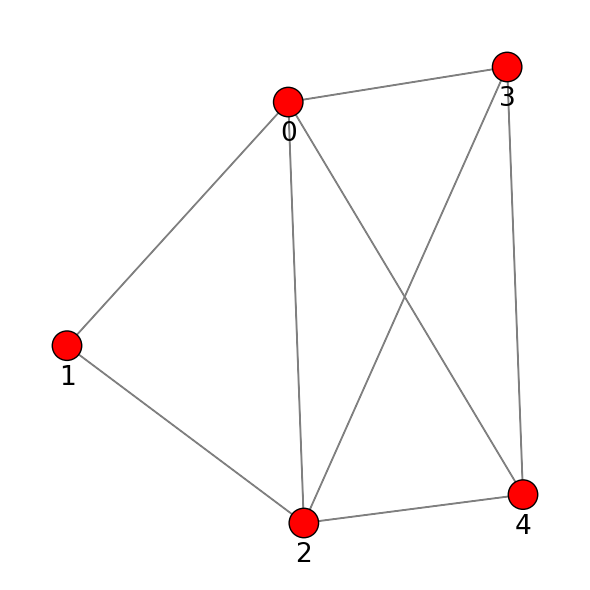

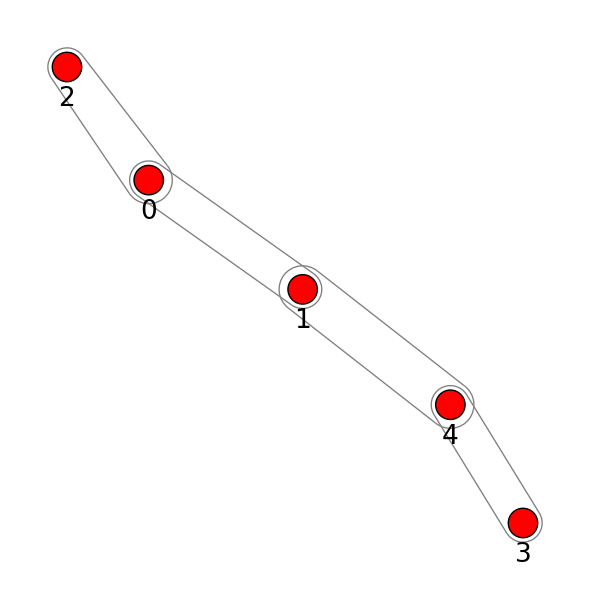

torch.Size([5, 2]) torch.Size([5, 2])


tensor([[0.5461, 0.2393, 0.4176, 0.3025],
        [0.5436, 0.3159, 0.4185, 0.3028],
        [0.4584, 0.3524, 0.5436, 0.3159],
        [0.6544, 0.4094, 0.6253, 0.4155],
        [0.4872, 0.2888, 0.5853, 0.3660]])

In [70]:
X = torch.rand(5, 2)
g = dhg.random.graph_Gnm(5, 8)
hg = dhg.random.hypergraph_Gnm(5, 4)
g.draw(v_label=[0, 1, 2, 3, 4])
hg.draw(v_label=[0, 1, 2, 3, 4])

plt.show()

X_low = g.v2v(X, aggr="mean")
X_high = hg.v2v(X, aggr="mean")
print(X_low.shape, X_high.shape)
X_ = torch.cat([X_low, X_high], dim=1)
X_

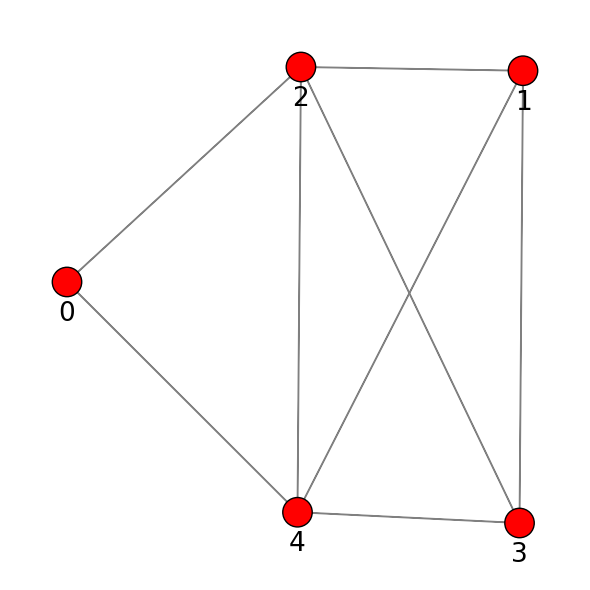

tensor([[0.4414, 0.5550],
        [0.6361, 0.1081],
        [0.3305, 0.5196],
        [0.2147, 0.2816],
        [0.6679, 0.7878]])

In [8]:
g = dhg.random.graph_Gnm(5, 8)
X = torch.rand(5, 2)

g.draw(v_label=[0, 1, 2, 3, 4])
plt.show()

print(g.e_both_side[0])
X

In [14]:
g.L_GCN.to_dense()
X_ = g.smoothing_with_GCN(X)
X_

tensor([[0.4049, 0.5226],
        [0.4359, 0.3898],
        [0.5039, 0.4919],
        [0.4359, 0.3898],
        [0.5039, 0.4919]])

In [15]:
g.L_sym.to_dense()
X_ = g.smoothing(X, g.L_sym, 0.1)
X_

tensor([[0.4502, 0.5643],
        [0.6637, 0.0718],
        [0.3067, 0.5210],
        [0.1861, 0.2685],
        [0.6863, 0.8227]])

In [18]:
hg = dhg.random.hypergraph_Gnm(5, 4)
X = torch.rand(5, 2)

X_ = hg.smoothing_with_HGNN(X)
X_

tensor([[0.3432, 0.4916],
        [0.4880, 0.5595],
        [0.0000, 0.0000],
        [0.4243, 0.7618],
        [0.4881, 0.6629]])